# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
!kaggle datasets download -d rabieelkharoua/predict-online-gaming-behavior-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100% 904k/904k [00:00<00:00, 1.44MB/s]
100% 904k/904k [00:00<00:00, 1.44MB/s]


In [ ]:
!unzip predict-online-gaming-behavior-dataset.zip

Archive:  predict-online-gaming-behavior-dataset.zip
  inflating: online_gaming_behavior_dataset.csv  


In [ ]:
df=pd.read_csv('/content/predict-online-gaming-behavior-dataset.zip')
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [ ]:
df.shape

(40034, 13)

In [ ]:
df.columns=df.columns.str.strip().str.lower()

In [ ]:
df.columns

Index(['playerid', 'age', 'gender', 'location', 'gamegenre', 'playtimehours',
       'ingamepurchases', 'gamedifficulty', 'sessionsperweek',
       'avgsessiondurationminutes', 'playerlevel', 'achievementsunlocked',
       'engagementlevel'],
      dtype='object')

In [ ]:
df=df.drop(['playerid'],axis=1)
ddf=df.copy()

# **EDA**

In [ ]:
ddf['gamegenre'].value_counts()

gamegenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

In [ ]:
ddf['ingamepurchases'].value_counts()

ingamepurchases
0    31993
1     8041
Name: count, dtype: int64

In [ ]:
x=ddf['ingamepurchases'][ddf['ingamepurchases']==1]

In [ ]:
ddf.groupby('gamegenre')['ingamepurchases'].value_counts()

gamegenre   ingamepurchases
Action      0                  6486
            1                  1553
RPG         0                  6376
            1                  1576
Simulation  0                  6373
            1                  1610
Sports      0                  6426
            1                  1622
Strategy    0                  6332
            1                  1680
Name: count, dtype: int64

<Axes: xlabel='gamegenre', ylabel='count'>

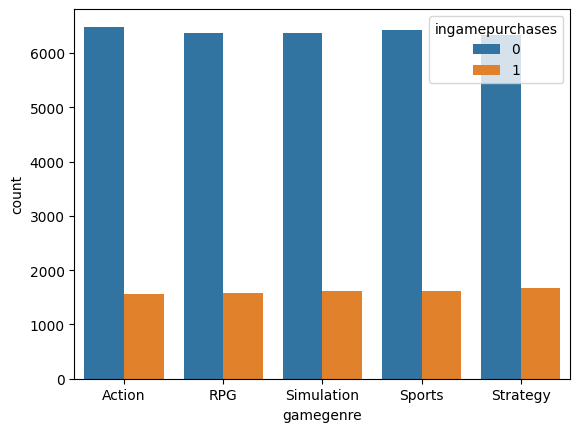

In [ ]:
grouped_df=ddf.groupby('gamegenre')['ingamepurchases'].value_counts().reset_index(name='count')
sns.barplot(data=grouped_df,x='gamegenre',y='count',hue='ingamepurchases')

In [ ]:
ddf['gender'].value_counts()

gender
Male      23959
Female    16075
Name: count, dtype: int64

Text(0, 0.5, 'frequency')

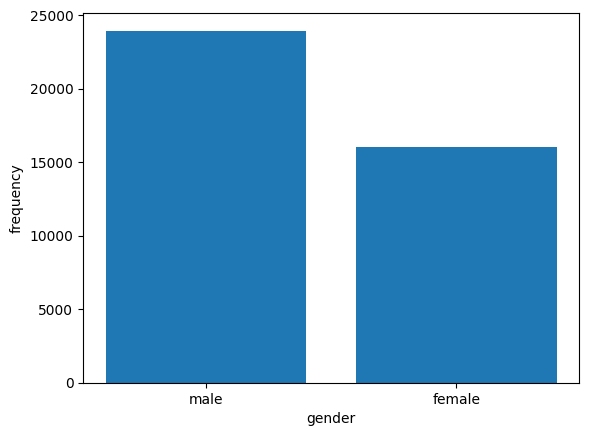

In [ ]:
plt.bar(['male','female'],df['gender'].value_counts().values)
plt.xlabel('gender')
plt.ylabel('frequency')

In [ ]:
ddf.groupby(['gamegenre','gender'])['gender'].count()

gamegenre   gender
Action      Female    3149
            Male      4890
RPG         Female    3235
            Male      4717
Simulation  Female    3218
            Male      4765
Sports      Female    3243
            Male      4805
Strategy    Female    3230
            Male      4782
Name: gender, dtype: int64

<Axes: xlabel='gamegenre', ylabel='count'>

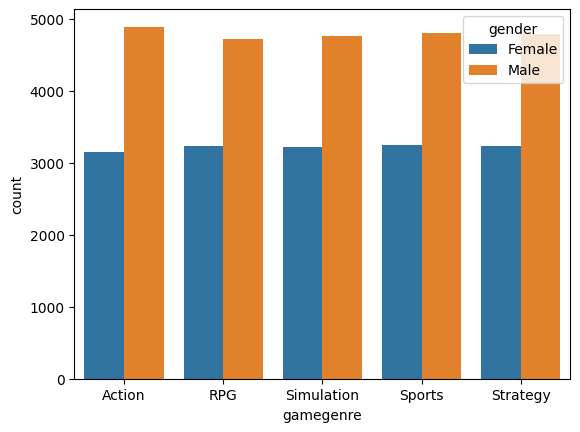

In [ ]:
grouped=ddf.groupby(['gamegenre','gender'])['gender'].count().reset_index(name='count')
sns.barplot(data=grouped,x='gamegenre',y='count',hue='gender')

In [ ]:
ddf.groupby('gamegenre')['playtimehours'].mean()

gamegenre
Action        12.164645
RPG           12.008113
Simulation    11.898085
Sports        11.968329
Strategy      12.081855
Name: playtimehours, dtype: float64

Text(0, 0.5, 'average of play_time_hours')

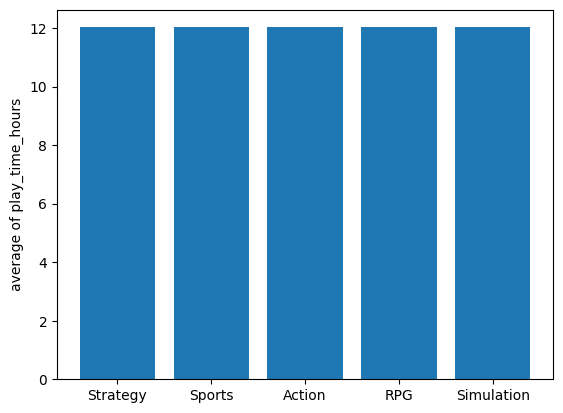

In [ ]:
plt.bar(['Strategy', 'Sports', 'Action', 'RPG', 'Simulation'],df['playtimehours'].mean())
plt.ylabel('average of play_time_hours')

In [ ]:
df['gamegenre'][df['playtimehours']<1].value_counts()

gamegenre
Sports        355
Strategy      343
Simulation    336
RPG           319
Action        305
Name: count, dtype: int64

Text(0, 0.5, 'playtimehours less than 1 hour')

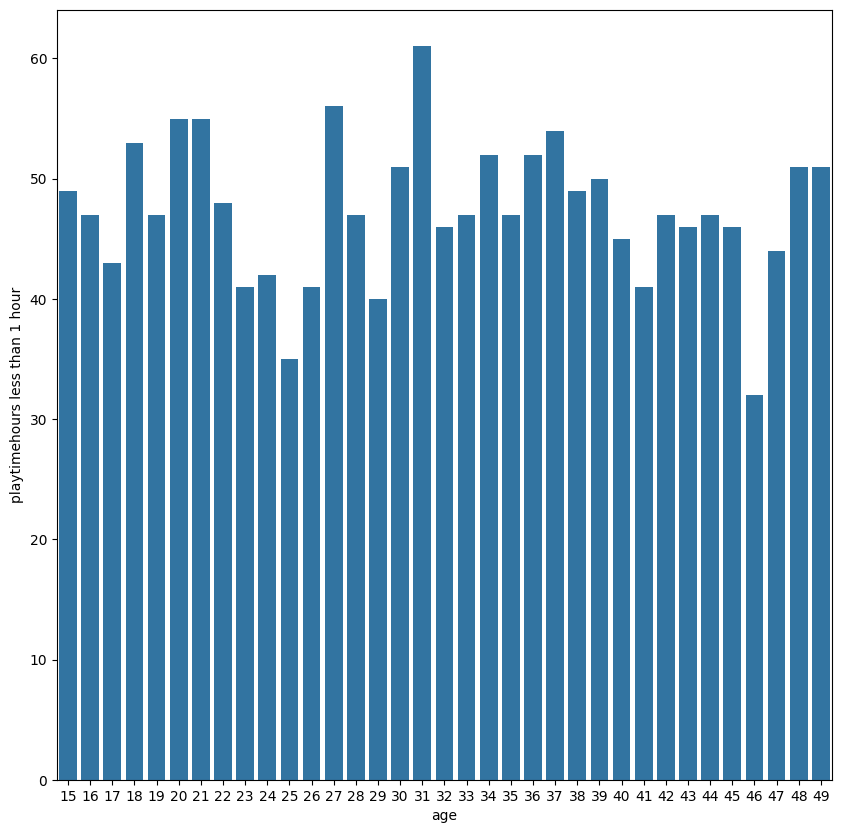

In [ ]:
x=ddf['age'][ddf['playtimehours']<1].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=x.index,y=x.values)
plt.xlabel('age')
plt.ylabel('playtimehours less than 1 hour')

Text(0, 0.5, 'frequency')

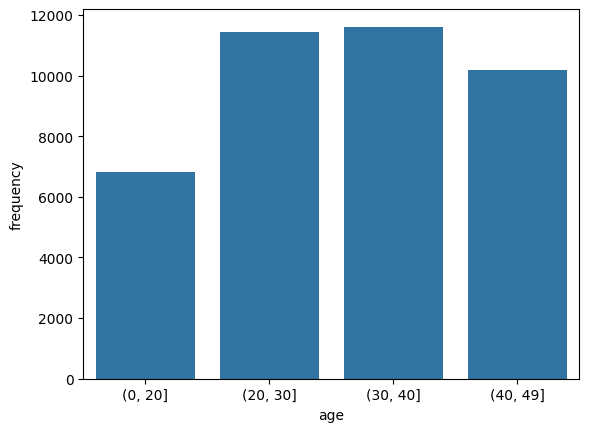

In [ ]:
age=pd.cut(ddf['age'],[0,20,30,40,49])
x=age.value_counts()
sns.barplot(x=x.index,y=x.values)
plt.ylabel('frequency')

<Axes: >

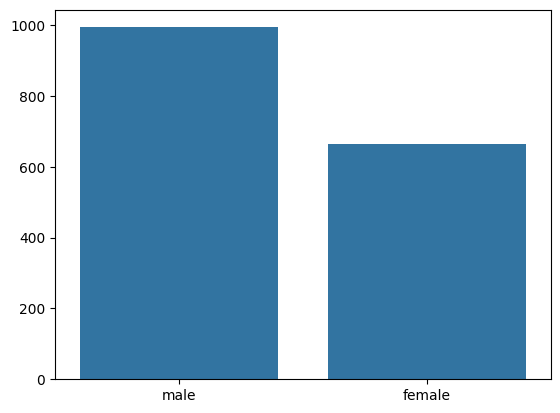

In [ ]:
x=df['gender'][df['playtimehours']<1].value_counts()
sns.barplot(x=['male','female'],y=x.values)

In [ ]:
x=ddf['location'][ddf['playtimehours']<1].value_counts()
x

location
USA       692
Europe    501
Asia      301
Other     164
Name: count, dtype: int64

Text(0, 0.5, 'playtimehours less than 1 hour')

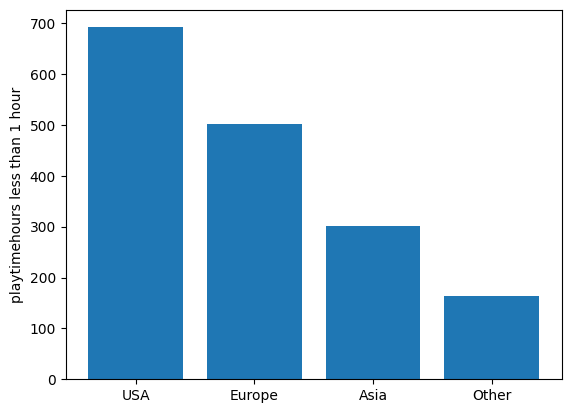

In [ ]:
plt.bar(['USA', 'Europe', 'Asia', 'Other'],x)
plt.ylabel('playtimehours less than 1 hour')

In [ ]:
df.groupby(['age','engagementlevel']).count()

gender  location  gamegenre  playtimehours  \
age engagementlevel                                               
15  High                312       312        312            312   
    Low                 290       290        290            290   
    Medium              499       499        499            499   
16  High                310       310        310            310   
    Low                 282       282        282            282   
...                     ...       ...        ...            ...   
48  Low                 272       272        272            272   
    Medium              527       527        527            527   
49  High                279       279        279            279   
    Low                 294       294        294            294   
    Medium              533       533        533            533   

                     ingamepurchases  gamedifficulty  sessionsperweek  \
age engagementlevel                                                     
15  High                         312             312              312   
    Low                          290             290              290   
    Medium                       499             499              499   
16  High                         310             310              310   
    Low                          282             282              282   
...                              ...             ...              ...   
48  Low                          272             272              272   
    Medium                       527             527              527   
49  High                         279             279              279   
    Low                          294             294              294   
    Medium                       533             533              533   

                     avgsessiondurationminutes  playerlevel  \
age engagementlevel                                           
15  High                                   312          312   
    Low                                    290          290   
    Medium                                 499          499   
16  High                                   310          310   
    Low                                    282          282   
...                                        ...          ...   
48  Low                                    272          272   
    Medium                                 527          527   
49  High                                   279          279   
    Low                                    294          294   
    Medium                                 533          533   

                     achievementsunlocked  
age engagementlevel                        
15  High                              312  
    Low                               290  
    Medium                            499  
16  High                              310  
    Low                               282  
...                                   ...  
48  Low                               272  
    Medium                            527  
49  High                              279  
    Low                               294  
    Medium                            533  

[105 rows x 10 columns]

In [ ]:
df['engagementlevel'][df['age']].value_counts()

engagementlevel
Medium    18382
High      12509
Low        9143
Name: count, dtype: int64

In [ ]:
rating_order=['Low','Medium','High']
ddf['engagementlevel']=pd.Categorical(ddf['engagementlevel'],categories=rating_order,ordered=True)

Text(0, 0.5, 'play_time_hours')

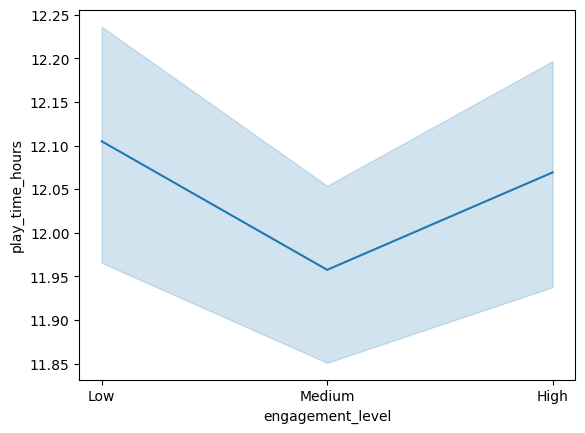

In [ ]:
sns.lineplot(x='engagementlevel',y='playtimehours',data=ddf)
plt.xlabel('engagement_level')
plt.ylabel('play_time_hours')

Text(0, 0.5, 'playerlevel')

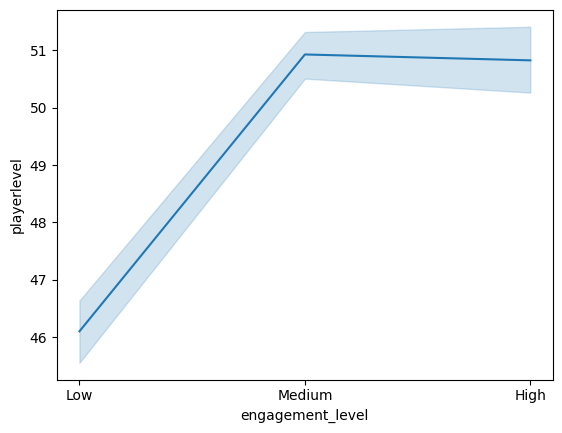

In [ ]:
sns.lineplot(x='engagementlevel',y='playerlevel',data=ddf)
plt.xlabel('engagement_level')
plt.ylabel('playerlevel')

# **Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        40034 non-null  int64  
 1   gender                     40034 non-null  object 
 2   location                   40034 non-null  object 
 3   gamegenre                  40034 non-null  object 
 4   playtimehours              40034 non-null  float64
 5   ingamepurchases            40034 non-null  int64  
 6   gamedifficulty             40034 non-null  object 
 7   sessionsperweek            40034 non-null  int64  
 8   avgsessiondurationminutes  40034 non-null  int64  
 9   playerlevel                40034 non-null  int64  
 10  achievementsunlocked       40034 non-null  int64  
 11  engagementlevel            40034 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.7+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['location'].unique()

array(['Other', 'USA', 'Europe', 'Asia'], dtype=object)

In [ ]:
wrapper={'Other':0,'USA':1,'Europe':2,'Asia':3}
df['location']=df['location'].replace(wrapper)

In [ ]:
df['gamegenre'].unique()

array(['Strategy', 'Sports', 'Action', 'RPG', 'Simulation'], dtype=object)

In [ ]:
wrapper={'Strategy':0,'Sports':1,'Action':2,'RPG':3,'Simulation':4}
df['gamegenre']=df['gamegenre'].replace(wrapper)

In [ ]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
wrapper={'Male':0,'Female':1}
df['gender']=df['gender'].replace(wrapper)

In [ ]:
df['engagementlevel'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [ ]:
wrapper={'Medium':1,'High':2,'Low':0}
df['engagementlevel']=df['engagementlevel'].replace(wrapper)

In [ ]:
df['gamedifficulty'].unique()

array(['Medium', 'Easy', 'Hard'], dtype=object)

In [ ]:
wrapper={'Medium':1,'Hard':2,'Easy':0}
df['gamedifficulty']=df['gamedifficulty'].replace(wrapper)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        40034 non-null  int64  
 1   gender                     40034 non-null  int64  
 2   location                   40034 non-null  int64  
 3   gamegenre                  40034 non-null  int64  
 4   playtimehours              40034 non-null  float64
 5   ingamepurchases            40034 non-null  int64  
 6   gamedifficulty             40034 non-null  int64  
 7   sessionsperweek            40034 non-null  int64  
 8   avgsessiondurationminutes  40034 non-null  int64  
 9   playerlevel                40034 non-null  int64  
 10  achievementsunlocked       40034 non-null  int64  
 11  engagementlevel            40034 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 3.7 MB


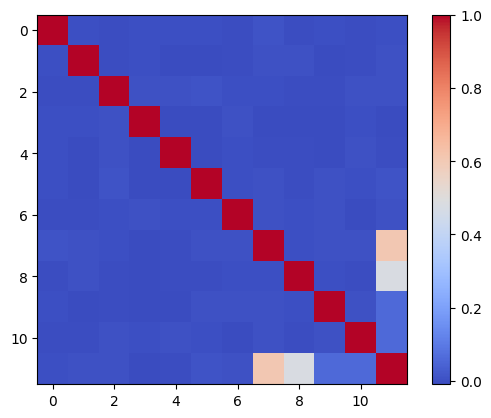

In [ ]:
heatmap=plt.imshow(df.corr(),cmap='coolwarm')
plt.colorbar(heatmap,orientation='vertical')

In [ ]:
df.describe()

,age,gender,location,gamegenre,playtimehours,ingamepurchases,gamedifficulty,sessionsperweek,avgsessiondurationminutes,playerlevel,achievementsunlocked,engagementlevel
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,31.992531,0.401534,1.605960,1.996153,12.024365,0.200854,0.700080,9.471774,94.792252,49.655568,24.526477,1.000300
std,10.043227,0.490215,0.916397,1.413449,6.914638,0.400644,0.781053,5.763667,49.011375,28.588379,14.430726,0.718383
min,15.000000,0.000000,0.000000,0.000000,0.000115,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000
25%,23.000000,0.000000,1.000000,1.000000,6.067501,0.000000,0.000000,4.000000,52.000000,25.000000,12.000000,0.000000
50%,32.000000,0.000000,2.000000,2.000000,12.008002,0.000000,1.000000,9.000000,95.000000,49.000000,25.000000,1.000000
75%,41.000000,1.000000,2.000000,3.000000,17.963831,0.000000,1.000000,14.000000,137.000000,74.000000,37.000000,2.000000
max,49.000000,1.000000,3.000000,4.000000,23.999592,1.000000,2.000000,19.000000,179.000000,99.000000,49.000000,2.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x786e7f7ddae0>,
 'caps': [<matplotlib.lines.Line2D at 0x786e7f7de020>,
 'boxes': [<matplotlib.lines.Line2D at 0x786e7f7dd840>],
 'medians': [<matplotlib.lines.Line2D at 0x786e7f7de560>],
 'fliers': [<matplotlib.lines.Line2D at 0x786e7f7de800>],
 'means': []}

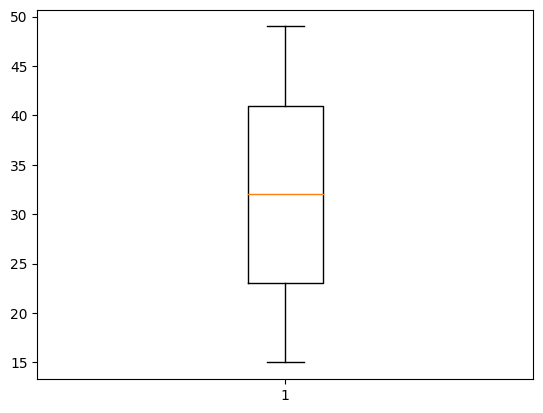

In [ ]:
plt.boxplot(df['age'])

(array([4555., 3380., 4541., 3432., 3565., 4540., 3513., 4628., 3454.,
        4426.]),
 array([15. , 18.4, 21.8, 25.2, 28.6, 32. , 35.4, 38.8, 42.2, 45.6, 49. ]),
 <BarContainer object of 10 artists>)

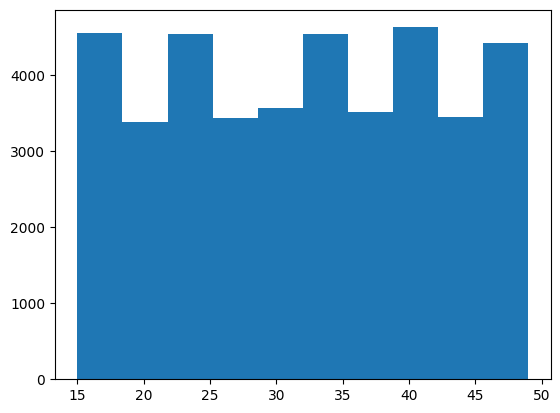

In [ ]:
plt.hist(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x786e7f24fd30>,
 'caps': [<matplotlib.lines.Line2D at 0x786e7f27c2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x786e7f24fa90>],
 'medians': [<matplotlib.lines.Line2D at 0x786e7f27c820>],
 'fliers': [<matplotlib.lines.Line2D at 0x786e7f27cac0>],
 'means': []}

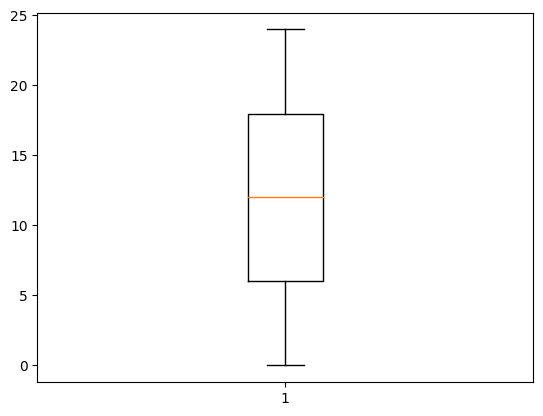

In [ ]:
plt.boxplot(df['playtimehours'])

(array([4013., 3887., 3983., 4157., 3966., 3967., 3955., 4080., 4017.,
        4009.]),
 array([1.14686620e-04, 2.40006238e+00, 4.80001008e+00, 7.19995777e+00,
        9.59990547e+00, 1.19998532e+01, 1.43998009e+01, 1.67997485e+01,
        1.91996962e+01, 2.15996439e+01, 2.39995916e+01]),
 <BarContainer object of 10 artists>)

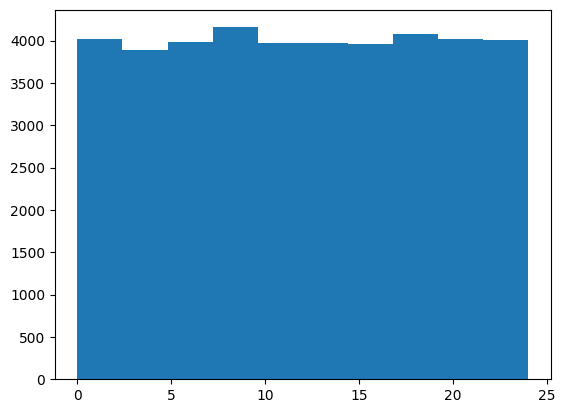

In [ ]:
plt.hist(df['playtimehours'])

{'whiskers': [<matplotlib.lines.Line2D at 0x786e7f8c5300>,
 'caps': [<matplotlib.lines.Line2D at 0x786e7f8f92d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x786e7f76bf70>],
 'medians': [<matplotlib.lines.Line2D at 0x786e7f8f9840>],
 'fliers': [<matplotlib.lines.Line2D at 0x786e7f8fa3b0>],
 'means': []}

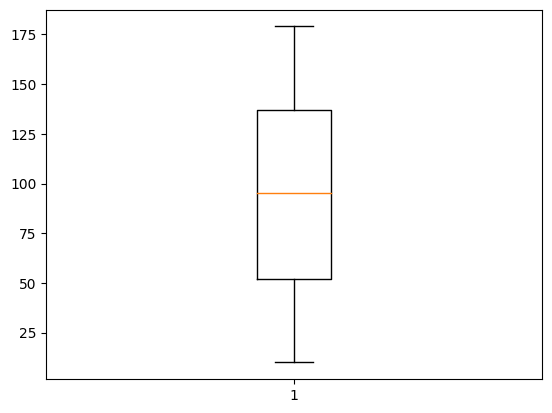

In [ ]:
plt.boxplot(df['avgsessiondurationminutes'])

(array([3917., 3959., 4082., 3962., 3977., 4025., 4028., 4034., 4091.,
        3959.]),
 array([ 10. ,  26.9,  43.8,  60.7,  77.6,  94.5, 111.4, 128.3, 145.2,
        162.1, 179. ]),
 <BarContainer object of 10 artists>)

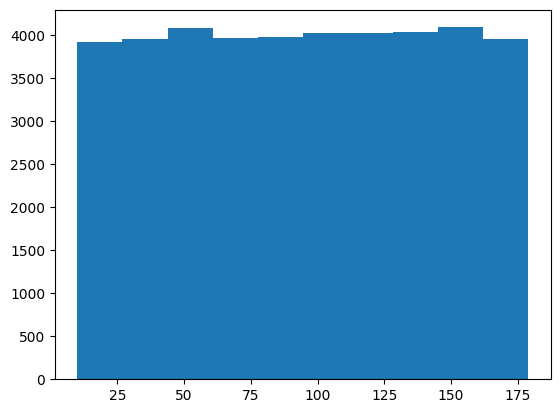

In [ ]:
plt.hist(df['avgsessiondurationminutes'],bins=10)

In [ ]:
df['avgsessiondurationminutes'].value_counts()

avgsessiondurationminutes
57     278
138    276
45     275
152    271
99     267
      ... 
49     205
32     204
163    195
74     193
78     189
Name: count, Length: 170, dtype: int64

In [ ]:
x=df.drop('engagementlevel',axis=1)
y=df['engagementlevel']

,age,gender,location,gamegenre,playtimehours,ingamepurchases,gamedifficulty,sessionsperweek,avgsessiondurationminutes,playerlevel,achievementsunlocked
0,43,0,0,0,16.271119,0,1,6,108,79,25
1,29,1,1,0,5.525961,0,1,5,144,11,10
2,22,1,1,1,8.223755,0,0,16,142,35,41
3,35,0,1,2,5.265351,1,0,9,85,57,47
4,33,0,2,2,15.531945,0,1,2,131,95,37
...,...,...,...,...,...,...,...,...,...,...,...
40029,32,0,1,0,20.619662,0,0,4,75,85,14
40030,44,1,0,4,13.539280,0,2,19,114,71,27
40031,15,1,1,3,0.240057,1,0,10,176,29,1
40032,34,0,1,1,14.017818,1,1,3,128,70,10


In [ ]:
y.value_counts()

engagementlevel
1    19374
2    10336
0    10324
Name: count, dtype: int64

# **MODELS**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(y_test,y_pred)
cf=confusion_matrix(y_test,y_pred)
class_r=classification_report(y_test,y_pred)

In [ ]:
print("accuracy : ",acc)
print("confusion_matrix : \n",cf)
print("classification_report :\n ",class_r)

accuracy :  0.7769544584131213
confusion_matrix : 
 [[2037  943   89]
 [ 532 4904  374]
 [ 106  635 2391]]
classification_report :
                precision    recall  f1-score   support

           0       0.76      0.66      0.71      3069
           1       0.76      0.84      0.80      5810
           2       0.84      0.76      0.80      3132

    accuracy                           0.78     12011
   macro avg       0.79      0.76      0.77     12011
weighted avg       0.78      0.78      0.78     12011



**svm**

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [ ]:
acc=accuracy_score(y_test,y_pred)
cf=confusion_matrix(y_test,y_pred)
class_r=classification_report(y_test,y_pred)

In [ ]:
print("accuracy : ",acc)
print("confusion_matrix : \n",cf)
print("classification_report :\n ",class_r)

accuracy :  0.8972608442261261
confusion_matrix : 
 [[2599  375   95]
 [ 188 5491  131]
 [ 101  344 2687]]
classification_report :
                precision    recall  f1-score   support

           0       0.90      0.85      0.87      3069
           1       0.88      0.95      0.91      5810
           2       0.92      0.86      0.89      3132

    accuracy                           0.90     12011
   macro avg       0.90      0.88      0.89     12011
weighted avg       0.90      0.90      0.90     12011



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
acc=accuracy_score(y_test,y_pred)
cf=confusion_matrix(y_test,y_pred)
class_r=classification_report(y_test,y_pred)

In [ ]:
print("accuracy : ",acc)
print("confusion_matrix : \n",cf)
print("classification_report :\n ",class_r)

accuracy :  0.836899508783615
confusion_matrix : 
 [[2464  391  214]
 [ 408 5015  387]
 [ 217  342 2573]]
classification_report :
                precision    recall  f1-score   support

           0       0.80      0.80      0.80      3069
           1       0.87      0.86      0.87      5810
           2       0.81      0.82      0.82      3132

    accuracy                           0.84     12011
   macro avg       0.83      0.83      0.83     12011
weighted avg       0.84      0.84      0.84     12011



**Naive_bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
acc=accuracy_score(y_test,y_pred)
cf=confusion_matrix(y_test,y_pred)
class_r=classification_report(y_test,y_pred)

In [ ]:
print("accuracy : ",acc)
print("confusion_matrix : \n",cf)
print("classification_report :\n ",class_r)

accuracy :  0.8371492798268254
confusion_matrix : 
 [[2096  894   79]
 [ 169 5540  101]
 [  89  624 2419]]
classification_report :
                precision    recall  f1-score   support

           0       0.89      0.68      0.77      3069
           1       0.78      0.95      0.86      5810
           2       0.93      0.77      0.84      3132

    accuracy                           0.84     12011
   macro avg       0.87      0.80      0.83     12011
weighted avg       0.85      0.84      0.83     12011



# Deployment

In [ ]:
import gradio as gr

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        40034 non-null  int64  
 1   gender                     40034 non-null  int64  
 2   location                   40034 non-null  int64  
 3   gamegenre                  40034 non-null  int64  
 4   playtimehours              40034 non-null  float64
 5   ingamepurchases            40034 non-null  int64  
 6   gamedifficulty             40034 non-null  int64  
 7   sessionsperweek            40034 non-null  int64  
 8   avgsessiondurationminutes  40034 non-null  int64  
 9   playerlevel                40034 non-null  int64  
 10  achievementsunlocked       40034 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 3.4 MB


In [ ]:
def pre(age,gender,location,game_genre,play_time_hours,ingamepurchases,gamedifficulty,sessionsperweek,avgsessiondurationminutes,playerlevel,achievementsunlocked):
    if gender=='male':
      gender=0
    elif gender=='female':
      gender=1
    if location=='other':
       location=0
    elif location=='USA':
       location=1
    else :
      location=2

    return fun(age,gender,location,game_genre,play_time_hours,ingamepurchases,gamedifficulty,sessionsperweek,avgsessiondurationminutes,playerlevel,achievementsunlocked)

In [ ]:
def fun(age,gender,location,game_genre,play_time_hours,ingamepurchases,gamedifficulty,sessionsperweek,avgsessiondurationminutes,playerlevel,achievementsunlocked):
   res=svm.predict([[age,gender,location,game_genre,play_time_hours,ingamepurchases,gamedifficulty,sessionsperweek,avgsessiondurationminutes,playerlevel,achievementsunlocked]])

   if res==0:
      res='low'
   elif res==1:
     res='medium'
   else:
      res='hard'


   return res

interface=gr.Interface(
    fn=pre,
    inputs=['number','number','number','number','number','number','number','number','number','number','number'],
    outputs='text',
    title='online_game'
)
interface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://5b079e0efab13e2bd3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://5b079e0efab13e2bd3.gradio.live
